# Insurance Firm Tour Insurance Prediction Case Study

## Problem Statement:

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## Data Description:

insurance_part2_data-1.csv is a dataset that contains the names of various colleges.

## Domain:
Insurance (Travel)

## Context:
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

## Attribute Information:

1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration)
7. Destination of the tour (Destination)
8. Amount of sales of tour insurance policies (Sales)
9. The commission received for tour insurance firm (Commission)
10. Age of insured (Age)


# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

## Read the data into the notebook


In [548]:
df2= pd.read_csv('insurance_part2_data.csv')

In [549]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [550]:
df2.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


## Exploratory Data Analysis 
 ## Checking the data types /information


In [551]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


- The data set contains 3000 observations of data and 10 attributes. 
- Data contains integer, float and object type columns.
- Since non null count is same in every column variable and is equal to total rows, hence there is no null data in any of these columns

## Checking for missing values

In [552]:
# Check for missing value in any colum
# user defined function already defined in problem 1
missing_check(df2)

,Total,Percent
Age,0,0.0
Agency_Code,0,0.0
Type,0,0.0
Claimed,0,0.0
Commision,0,0.0
Channel,0,0.0
Duration,0,0.0
Sales,0,0.0
Product Name,0,0.0
Destination,0,0.0


We can confirm that there is no NULL value

## Checking the shape (Number of rows and columns)

In [553]:
df2.shape

(3000, 10)

## Checking for duplicates

In [554]:
# Check for duplicate data

dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df2[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


Total of 1390 duplicates are present in the data. With the data available it appears that same tour operator can give same tour with same plan to same age group people via same channel (say online) which will give same sale and commision to the insurance firm.  More details like dates of travel and Insured person name etc would be required here to find if these are genuinely duplicate. So this doesent appears to be a duplicate data entry problem.

Hence at the moment, we are not removing the duplicates here.

# Univariate Analysis

## Checking for summary

In [555]:
df2_summ=pd.DataFrame(df2.describe().round(2))
df2.describe(include='all')


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


From summary, we can see that :-

- Channel used in tour is primarily online (98%) as it contains 2954 rows out of 3000 rows.
- Around 60% tour insurance firm are 'Travel Agency' type.
- Around 37% of tours are customised plan only.
- Min value for duration is -1 which is strange as duration cannot be negative.
- Max duration value also seems to be very high (4580). This value is extremely high and its causing data to be skewed.
- Max age also appears to be high as compared to the other percentile values, so there appears to be outliers in age column too
- Max Commission , max sale and max duration for tours seemt be very high as compared to their mean. So there appears to be outliers in this data i.e. for few tours sale, duration and commission amounts are very high as compared to the other tours


## Checking IQR, Coeffiecient of Variation, IQR, lower range and upper range of numerical cols

In [556]:
df2_summ.loc["CV"],df2_summ.loc["Skew"],df2_summ.loc["IQR"],df2_summ.loc["UR"],df2_summ.loc["LR"]= CV_row(df2)

In [557]:
df2_summ.round(2)

,Age,Commision,Duration,Sales
count,3000.00,3000.00,3000.00,3000.00
mean,38.09,14.53,70.00,60.25
std,10.46,25.48,134.05,70.73
min,8.00,0.00,-1.00,0.00
25%,32.00,0.00,11.00,20.00
50%,36.00,4.63,26.50,33.00
75%,42.00,17.24,63.00,69.00
max,84.00,210.21,4580.00,539.00
CV,0.27,1.75,1.91,1.17
Skew,1.15,3.15,13.78,2.38


As we can see in detail summary that
- All columns are positively skewed (right skewed)
- Max values are very high as compared to the upper range (UR)

## Check for Outliers (Which all variables have an outlier?)

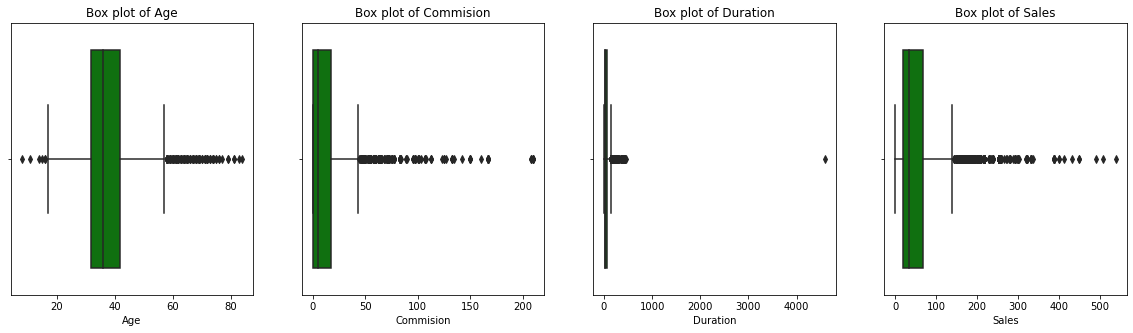

In [558]:
# Checking for Outliers
numeric_col_names=numeric_datatype_df(df2)
no_of_graphs_rows=4
rows=calc_rows(numeric_col_names, no_of_graphs_rows)
    
plt.figure(figsize= (20,5))
box_plot_no=1
for col in df2.columns :
#    if (col in numeric_col_names):
    if (df2[col].dtype == 'int64') | (df2[col].dtype == 'float64'):
        box_plot_title = "Box plot of " + col
        plt.subplot(rows,no_of_graphs_rows,box_plot_no)
        sns.boxplot(x= col,data =df2 ,color='green').set(title =box_plot_title)
        box_plot_no = box_plot_no + 1 


We can confirm visually from box plots that there are outliers in all the four numeric columns.

## Plot the Histograms

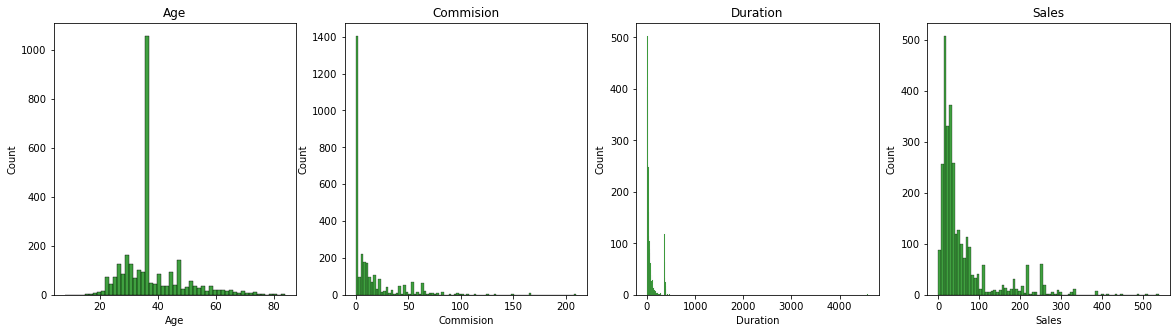

In [559]:
#Plots to see the distribution of the continuous features individually
plt.figure(figsize= (20,5*rows))
distplot_no=1
for col in df2.columns :
    if (col in numeric_col_names):
        distplot_title = col
        plt.subplot(rows,no_of_graphs_rows,distplot_no)
        sns.histplot(df2[col] ,color='green').set(title =distplot_title)
        distplot_no = distplot_no + 1 


From histograms we can see that 
 - Frequency of the records is too high for few values which is causing spikes in all the 4 histograms.
 - For Age more than 1000 records (33%) are of age near about 35-40. It means 33% of the travellers are in age group 35-40.
 - For commission around 1400 records (around  45%) have commission as 0. It means for almost 50% of tours no commission is earnred.
 - Sale of tour insurance company is low for majority of the tours.
 - In duration some values are extremely high which is causing x axis scale to be on higher side.


### Analysing Duration for negative records

In [560]:
df2[df2["Duration"]<=0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


There seems to be some issues with duration here, as all other values commission , sales, destination seems to contain data but duration of tour is 0 and negative for one row. These seems to be incorrect.
We need to ask business for more clarification of these records.
As of now we are imputing duration with 0 for this record.

In [561]:
# replacing 0 with 3 in cluster so as to compare agglo and Fcluster ouput
df2.Duration = df2.Duration.replace(to_replace = -1, value =0)

In [562]:
df2[df2["Duration"]<=0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,0,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [563]:
df2[df2["Duration"]>400]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
283,27,C2B,Airlines,Yes,54.00,Online,401,216.00,Silver Plan,ASIA
642,31,CWT,Travel Agency,No,0.00,Offline,402,97.00,Customised Plan,ASIA
873,31,C2B,Airlines,No,46.96,Online,428,187.85,Silver Plan,ASIA
1398,34,C2B,Airlines,Yes,68.08,Online,431,272.30,Silver Plan,ASIA
1898,28,C2B,Airlines,No,63.21,Online,401,252.85,Silver Plan,ASIA
2063,31,C2B,Airlines,Yes,63.21,Online,413,252.85,Silver Plan,ASIA
2260,42,CWT,Travel Agency,No,132.99,Online,434,204.60,Gold Plan,ASIA
2285,34,CWT,Travel Agency,No,166.53,Online,421,256.20,Gold Plan,Americas
2466,30,CWT,Travel Agency,Yes,210.21,Online,417,323.40,Gold Plan,Americas
2813,44,C2B,Airlines,Yes,63.21,Online,419,252.85,Silver Plan,ASIA


As seen in the above data, out of 3000 rows only 1 row contins 4580 as duration which seems to be very high.
With such high value in duration , Sales and comission values are very less in contrast which again points that there is some problem in this figure

As of now we are imputing this value with the next highest value near about 466. It also appears that there could be 0 added accidently in this duration figure in this row. Hence we are imputing it with 458.

In [564]:
df2.Duration = df2.Duration.replace(to_replace = 4580, value =458)

[Text(0.5, 1.0, 'Histogram of Duration')]

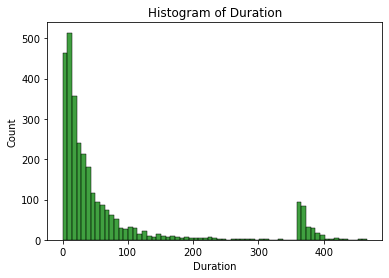

In [565]:
sns.histplot(df2.Duration ,color='green').set(title ="Histogram of Duration")

Now Duration histogram appears in better shape and we can see that most of the tours conducted are for less than 100 duration. Few tours are in range of 350-400. These appear be full year packages.

## Checking value count of categorical variables

In [566]:
df2.Type.value_counts(normalize=True).round(4)*100

Travel Agency    61.23
Airlines         38.77
Name: Type, dtype: float64

Around 60% of tours are of type Travel Agency and remaining 40% from Airlines

In [567]:
df2.Agency_Code.value_counts(normalize=True).round(4)*100

EPX    45.50
C2B    30.80
CWT    15.73
JZI     7.97
Name: Agency_Code, dtype: float64

4 agencies are used in which EPX has the highest 45% of data

In [568]:
df2.Channel.value_counts(normalize=True).round(4)*100

Online     98.47
Offline     1.53
Name: Channel, dtype: float64

Only 1% of tours come via channel "Offline" i.e. all the tours come via online channel

In [569]:
df2["Product Name"].value_counts(normalize=True).round(4)*100

Customised Plan      37.87
Cancellation Plan    22.60
Bronze Plan          21.67
Silver Plan          14.23
Gold Plan             3.63
Name: Product Name, dtype: float64

5 products are used here in which customised plan is the highest with 38% data

In [570]:
df2["Destination"].value_counts(normalize=True).round(4)*100

ASIA        82.17
Americas    10.67
EUROPE       7.17
Name: Destination, dtype: float64

For majority of the tours, Destination is Asia (82%) followed by America (11%) and Europe (7%)

## Checking value count of Target variable

In [571]:
df2["Claimed"].value_counts(normalize=True).round(4)*100

No     69.2
Yes    30.8
Name: Claimed, dtype: float64

Around 70% of tours have not claimed from insurance while 30% have claimed from the insurance. This target variable appears to be slighly imbalanced

# Bi-variate, and multivariate analysis

### Catplot

<Figure size 1440x360 with 0 Axes>

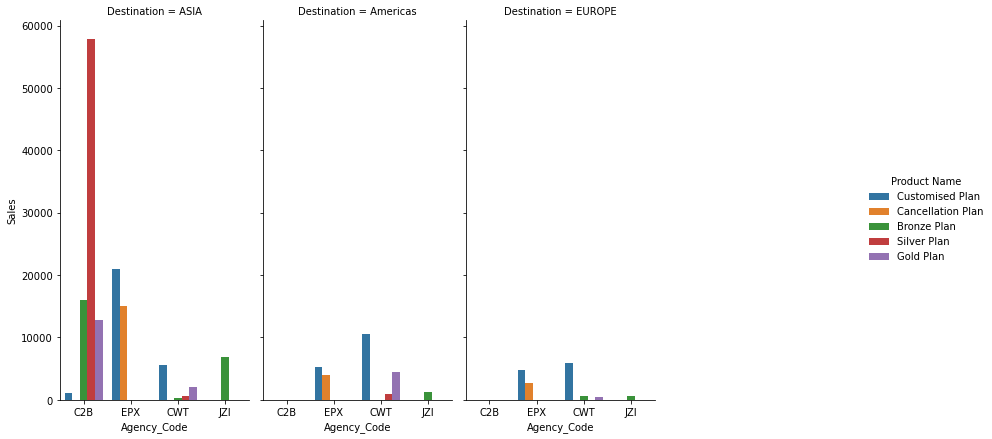

In [572]:
plt.figure(figsize=(20,5))

g=sns.catplot( hue="Product Name",
               y="Sales",
               x="Agency_Code", 
               col="Destination", 
               data=df2, ci=False,
               col_wrap=4,estimator=sum,
            height=6, aspect=0.5,
               kind="bar");

We can see observe from above graph that :-
   - Agency Code 'C2B' is working for ASIA geography only. It has no sale for Ameria and Europe
   - Agency code 'EPX','CWT',  and 'JZI' are getting sales in all three geographies. 
   - Agency code 'JZI' sales figures are low compared to other agencies.    

<Figure size 720x360 with 0 Axes>

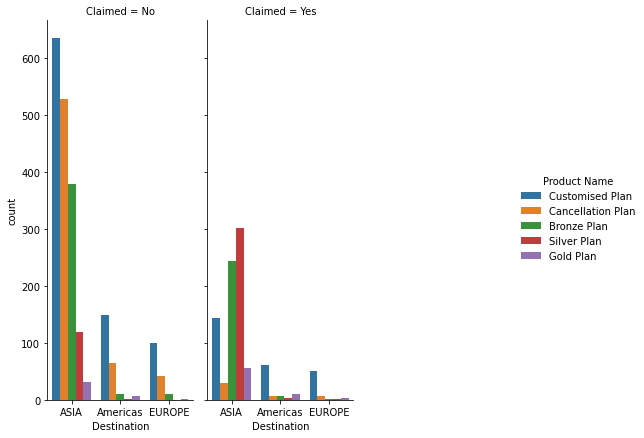

In [573]:
plt.figure(figsize=(10,5))

g=sns.catplot( hue="Product Name",
               #y="Sales",
               x="Destination", 
               col="Claimed", 
               data=df2, 
               col_wrap=3,
            height=6, aspect=0.4,
               kind="count");

<Figure size 1440x720 with 0 Axes>

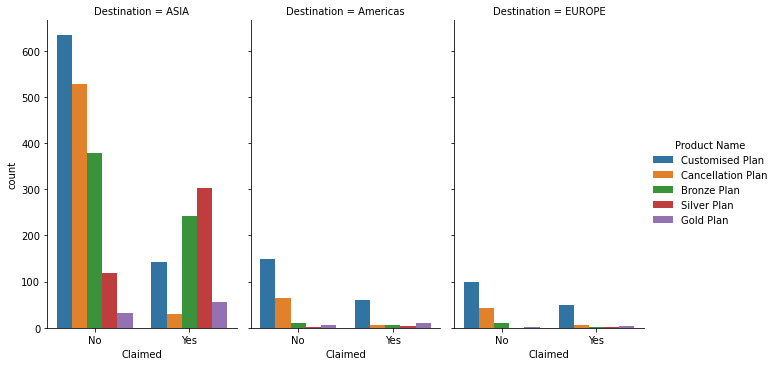

In [574]:
plt.figure(figsize=(20,10))

g=sns.catplot( hue="Product Name",
               #y="Sales",
               x="Claimed", 
               col="Destination", 
               data=df2, 
               col_wrap=3,
            height=5, aspect=0.6,
               kind="count");

 Customised plan contains 38% of the total data. Still we can see that under Asia geogrpahy, Bronze and Silver plan have taken more claim from insurance as compared to Customised Plan.

<Figure size 1440x720 with 0 Axes>

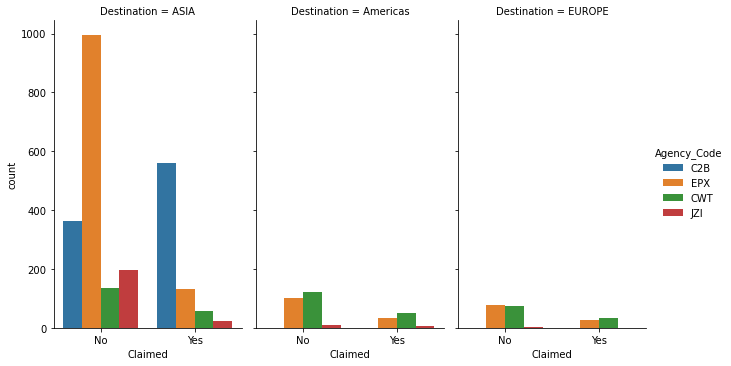

In [575]:
plt.figure(figsize=(20,10))

g=sns.catplot( hue="Agency_Code",
               #y="Sales",
               x="Claimed", 
               col="Destination", 
               data=df2, 
               col_wrap=3,
            height=5, aspect=0.6,
               kind="count");

We can see that 'C2B' agency workining under ASIA demography is claiming more i.e around 580 claims and 380 no claims. It means 60% of its tour are getting claimed.

Lets create crosstab table for checking the exact stats agency wise

In [576]:
df2a=pd.DataFrame(pd.crosstab(df2["Agency_Code"],df2["Claimed"],margins=True))
df2a["Claim_percentage"] =  (df2a["Yes"] * 100 / df2a["All"]).round(2)
df2a

Claimed,No,Yes,All,Claim_percentage
Agency_Code,,,,
C2B,364,560,924,60.61
CWT,331,141,472,29.87
EPX,1172,193,1365,14.14
JZI,209,30,239,12.55
All,2076,924,3000,30.80


From this crosstab table, its confirmed that 'C2B' agency has the highest claim percentage than the other and its causing total claims for the insurance firm to be on higher side

### Correlation matrix

In [577]:
Cor=df2.corr().round(2)
Cor

,Age,Commision,Duration,Sales
Age,1.00,0.07,0.03,0.04
Commision,0.07,1.00,0.60,0.77
Duration,0.03,0.60,1.00,0.72
Sales,0.04,0.77,0.72,1.00


### Heat Map

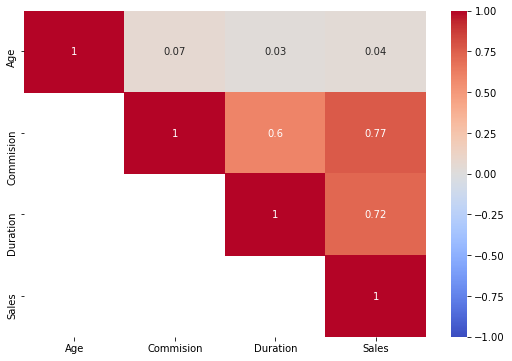

In [578]:
# plot the correlation coefficients as a heatmap
## Correlation Matrix
plt.figure(figsize=(9 ,6))
mask = np.array(Cor)
mask[np.triu_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='coolwarm');

We can see in heatmap & correlation matrix that  
  - Commission , Sales and Duration are positively correlated with each other. 
  - Age doesnt seems to be correlated with any other attributes.


### Pairplot

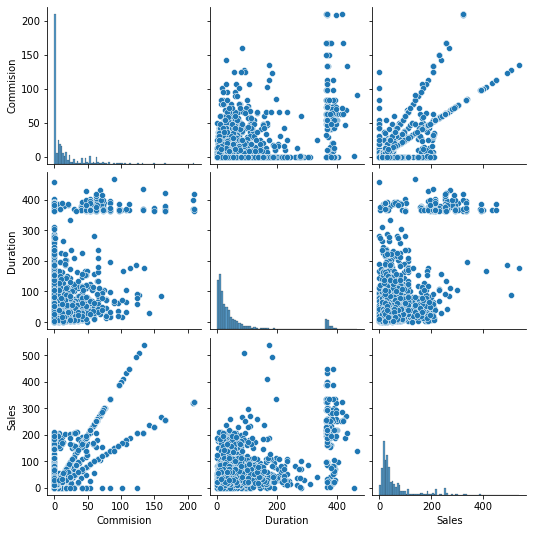

In [579]:
sns.pairplot (df2[["Commision","Duration","Sales"]])

-  As depicted in heatmap, we can ee the positive correlation clearly between Sales and Duration.
- Between Duration and sales, there is slight correlation on positive side  but there seems to be few tours in which sales is less but duration is high.

# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network


In [587]:
# taking a backup of df2 dataframe
df2_bkp = df2.copy(deep=True)
df2_bkp.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [885]:
df2_bkp.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


## Converting Object into int
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.

In [589]:
col_name =[] 
act_val = []
coded_val = []
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
#         print('feature:',feature)
#         print(pd.Categorical(df2[feature].unique()))
#         print(pd.Categorical(df2[feature].unique()).codes)
        i=0
        while (i<pd.Categorical(df2[feature].unique()).size):           
            act_val.append(df2[feature].unique()[i])
            coded_val.append(str(pd.Categorical(df2[feature].unique()).codes[i]))
            col_name.append(feature)
            i=i+1
        df2[feature] = pd.Categorical(df2[feature]).codes



In [597]:
# creating a dataframe showing the mapping for future reference        
data = {"col_name": col_name, 
        "actual_value": act_val, 
        "coded_value": coded_val} 
  
df2_map = pd.DataFrame(data)
df2_map.sort_values(by=['col_name', 'coded_value'])


,col_name,actual_value,coded_value
0,Agency_Code,C2B,0
2,Agency_Code,CWT,1
1,Agency_Code,EPX,2
3,Agency_Code,JZI,3
9,Channel,Offline,0
8,Channel,Online,1
6,Claimed,No,0
7,Claimed,Yes,1
15,Destination,ASIA,0
16,Destination,Americas,1


In [598]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


Now we can see that all values are numerical

In [599]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [600]:
for col in df2_map["col_name"].unique() :
        print ("Proportion of", col, "(in %)")
        print ((df2[col].value_counts(normalize=True).round(2)*100).to_string())
        print ("\n")


Proportion of Agency_Code (in %)
2    46.0
0    31.0
1    16.0
3     8.0


Proportion of Type (in %)
1    61.0
0    39.0


Proportion of Claimed (in %)
0    69.0
1    31.0


Proportion of Channel (in %)
1    98.0
0     2.0


Proportion of Product Name (in %)
2    38.0
1    23.0
0    22.0
4    14.0
3     4.0


Proportion of Destination (in %)
0    82.0
1    11.0
2     7.0




Label Encoding has been done and all columns are converted to number

### Proportion of 1s and 0s in Target Variable

In [1136]:
df2_bkp.Claimed.value_counts(normalize=True).round(2)*100

No     69.0
Yes    31.0
Name: Claimed, dtype: float64

This target variable is slightly imbalanced

## Builing CART Model

In [626]:
from sklearn.tree import DecisionTreeClassifier

## Extracting the target column into separate vectors for training set and test set

In [603]:
X = df2.drop("Claimed", axis=1)

Y = df2.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


### Splitting data into training and test set

In [1513]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=1)

### Checking the dimensions of the training and test data

In [1514]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Observations',df2.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Observations (3000, 9)


We can see that data has been splitted into train(70%) and test(30%) successfully

### Building a Decision Tree Classifier

In [1515]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [1516]:
# Fit the model
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [1517]:
from sklearn import tree

train_char_label = ['No', 'Yes']
df2_Tree_File = open('df2_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=df2_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

df2_Tree_File.close()


The above code will save a .dot file in the working directory. 
WebGraphviz is Graphviz in the Browser.   
we can copy paste the contents of the file into the link below to get the visualization     
http://webgraphviz.com/

In [1518]:
dt_model.score(X_train,train_labels)

0.9947619047619047

In [1519]:
dt_model.score(X_test,test_labels)

0.7266666666666667

### Regularising the Decision Tree


#### Importing libraries

In [1520]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


#### creating user define function so to run CART model multiple times for different grid search parameters

In [1521]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search

In [1522]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

#### using SKlearn grid search

 Initially we need to assume values of search grid parameters. 
 
 In decision tree visualization , we can see that tree has overgrown to about 25-26 depth, hence we are taking max_depth as [7 13 20]
 
 min_samples_leaf is normally taken around 1-3% of observations , hence taking it as [30 60 90]
 
 min_samples_split is normally 3 times min_samples_leaf, hence taking it as [90 180 270].
 
 CV parameter is taken as 10 (10 cross fold validation)

In [1523]:
dt_model = DecisionTreeClassifier(random_state=1)
cv_value = 10
scoring_value = 'accuracy'
param_grid = {
    'max_depth': [7, 13, 20],
    'min_samples_leaf': [30, 60, 90],
    'min_samples_split': [90, 180, 270]
}

In [1524]:
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 7, 'min_samples_leaf': 60, 'min_samples_split': 180}


We can see that best result we got for our min value of max_depth, middle value of min_samples_split and middle value of min_samples_leaf. We can try reducing the max_depth and try to find out the best result but before that lets check the performance of model with these parameters

In [1525]:
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.57      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.73      2100
weighted avg       0.78      0.79      0.78      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



As insurance company is facing higher claim frequency, we are more interested in predicting the claimed status as 1. We have following results from the test and train data set for the CART model

- around 79% accuracy and 57% recall rate for train data set. 
- around 77% accuracy and only 48% recall rate for test data set.

Difference in recall in test and train is high (around more than 10%). Also recall percentage is very low i.e 50% of correct claim prediction. This appears to be the case of underfitting. We need to fine tune/prune the parameters for better results

#### Pruning the grid seach parameters again

In [1526]:
param_grid = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [50, 60, 70],
    'min_samples_split': [160, 180, 200]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value)
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 6, 'min_samples_leaf': 60, 'min_samples_split': 200}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.57      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.73      2100
weighted avg       0.78      0.79      0.78      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



Similar results with no improvement in recall

In [1527]:
param_grid = {
    'max_depth': [10, 20, 30, 50],
    'min_samples_leaf': [50, 100, 150],
    'min_samples_split': [150, 300, 450]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value)
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.78      0.79      0.78      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       605
           1       0.73      0.38      0.50       295

    accuracy                           0.75       900
   macro avg       0.74      0.66      0.67       900
weighted avg       0.75      0.75      0.72       900



In [1528]:
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': [58, 60, 62],
    'min_samples_split': [208, 210, 212]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value)
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 212}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.57      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.73      2100
weighted avg       0.78      0.79      0.78      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [1529]:
param_grid = {
    'max_depth': [4,5,6],
    'min_samples_leaf': [59, 60, 61],
    'min_samples_split': [210,211,212]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value,scoring_value)
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 5, 'min_samples_leaf': 60, 'min_samples_split': 211}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1471
           1       0.67      0.57      0.62       629

    accuracy                           0.79      2100
   macro avg       0.75      0.73      0.73      2100
weighted avg       0.78      0.79      0.78      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



We are not getting significant improvement in the output even after changing pruning parameters several times. Trying to change the scoring parameter in search grid for recall.

In [1530]:
param_grid = {
    'max_depth': [2,5,8],
    'min_samples_leaf': [5, 40, 60],
    'min_samples_split': [15,180,211]
}
scoring_value = 'recall'
grid_search = run_gridsearch(dt_model,param_grid,X_train, train_labels,cv_value,scoring_value)
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 15}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1471
           1       0.69      0.61      0.65       629

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.72      0.51      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



Now we can seet that without comprimising on accuracy, recall rate has gone up by 4-5% for both test and train data set. Hence we are stopping here

#### Saving the results of best search grid 

In [1531]:
best_grid = grid_search.best_estimator_
ytrain_predict_CART = best_grid.predict(X_train)
ytest_predict_CART = best_grid.predict(X_test)


### Generating New Tree

In [1532]:
df2_tree_regularized = open('df2_tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= df2_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

df2_tree_regularized.close()
dot_data

### Variable Importance

In [1533]:
df2_fi=pd.DataFrame(best_grid.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

,Important Feature
Agency_Code,55.965392
Sales,24.945289
Product Name,7.185651
Duration,5.414738
Commision,3.781270
Channel,1.500579
Type,0.687259
Age,0.519822
Destination,0.000000


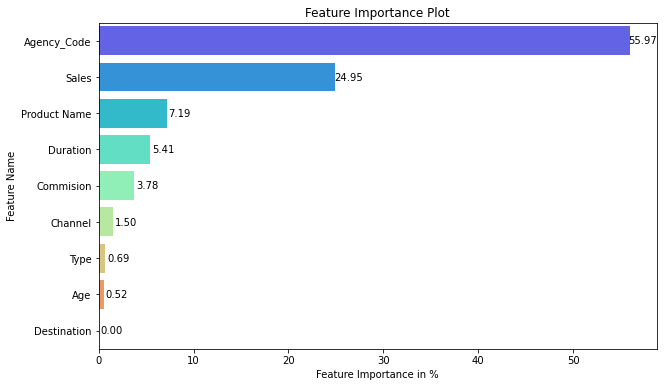

In [1534]:
plt.figure(figsize=(10,6))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Type, Commission, Channel and Destination have no imortance in predicting the insurance claims

## Model Evaluation

### Model Score

#### Model score for the Training Data

In [1535]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels)
cart_train_acc

0.8028571428571428

#### Model score for the Testing Data

In [1536]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7733333333333333

### Measuring AUC-ROC Curve

In [1427]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [1428]:
# creating user define function for calculating AUC and plotting the ROC curve
def calc_AUC_ROC_curve(probs,labels):
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate AUC   
    auc = roc_auc_score(labels, probs)
    print('AUC: %.3f' % auc)
    # calculate roc curve   
    fpr, tpr, thresholds = roc_curve(labels, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the plot
    plt.show()
    return auc,fpr, tpr, thresholds

#### AUC and ROC for the training data

AUC: 0.846


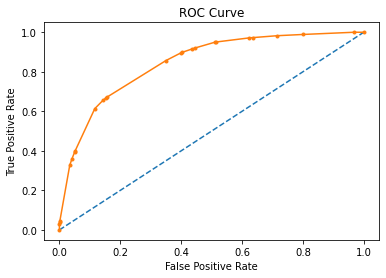

In [1429]:
probs = best_grid.predict_proba(X_train)
cart_train_auc,cart_train_fpr, cart_train_tpr, cart_train_thresholds=calc_AUC_ROC_curve(probs,train_labels)

#### AUC and ROC for the test data

AUC: 0.802


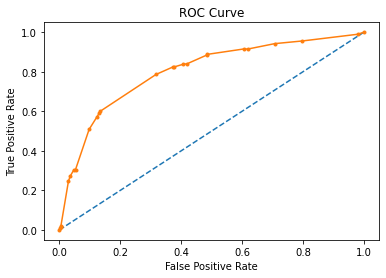

In [1430]:
probs = best_grid.predict_proba(X_test)
cart_test_auc,cart_test_fpr, cart_test_tpr, cart_test_thresholds=calc_AUC_ROC_curve(probs,test_labels)

### Confusion Matrix for the Training data

In [1431]:
from sklearn.metrics import classification_report,confusion_matrix

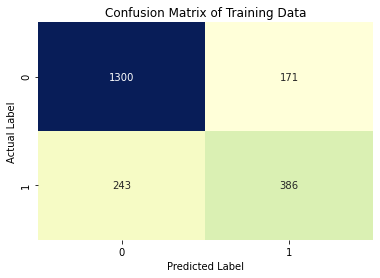

In [1432]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_CART), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Training Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Training data

In [1433]:
print (classification_report(train_labels,ytrain_predict_CART))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1471
           1       0.69      0.61      0.65       629

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100



In [1434]:
cart_metrics=classification_report(train_labels, ytrain_predict_CART,output_dict=True)
df2_metrics=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df2_metrics.loc["1"][2],2)
cart_train_recall=round(df2_metrics.loc["1"][1],2)
cart_train_precision=round(df2_metrics.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.61
cart_train_f1  0.65


### Confusion Matrix for the Testing data

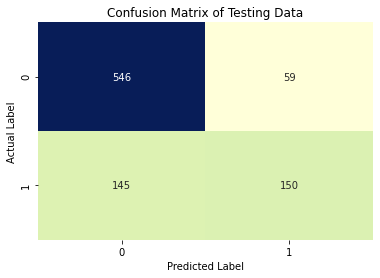

In [1435]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_CART), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Testing Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Testing data

In [1436]:
print (classification_report(test_labels,ytest_predict_CART))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.72      0.51      0.60       295

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.77      0.77      0.76       900



In [1437]:
cart_metrics=classification_report(test_labels, ytest_predict_CART,output_dict=True)
df2_metrics=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df2_metrics.loc["1"][0],2)
cart_test_recall=round(df2_metrics.loc["1"][1],2)
cart_test_f1=round(df2_metrics.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.72
cart_test_recall  0.51
cart_test_f1  0.6


### CART Conclusion

<b>Train Data: </b>

    AUC: 84%
    Accuracy: 80%
    Precision: 69%
    f1-Score: 65%
    Recall: 61%

<b>Test Data: </b>

    AUC: 80%
    Accuracy: 77%
    Precision: 72%
    f1-Score: 60%
    Recall: 51%


Except Recall, other measures for test and train are inline with each other. Model is slighly overfitted as difference in recall in test and train is near about 10%

With recall rate of 51%, model is only able to predict 51% of total tours which were actually claimed as claimed.

Precision is 72% of test data which means, out of total tours predicted by model as claimed , 72% were actually claimed.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Agency Code, Sales, Product Name, Duration and Commission (in same order of preference) are the most important variables in determining if a tour will be claimed from insurance company

Since we are building a model to predict if a tour will be claimed for insurance or not, for practical purposes, we will be more interested in correctly classifying 1 (taking insurance claim) than 0(not taking insurance claim).

If a tour not claiming by the insurer is incorrectly predicted to be claimed by the model, then the impact on cost for the insurance company would be bare minimum. But if a tour claimed by the insurer is incorrectly predicted to be not claimed by the model, then the cost impact would be very high for the insurance company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

#### As Recall rate of test dataset is very poor around 50% thus this doesnt looks good enough for classification 



# Ensemble RandomForest Classifier

In [1438]:
from sklearn.ensemble import RandomForestClassifier

In [1439]:
rfcl = RandomForestClassifier(random_state=1)

Initially we need to assume values of search grid parameters. 
 
like in decision tree visualization , we can see that tree has overgrown to about 25-26 depth, hence we are taking max_depth as [5 10]

max_features is taken as [5 8]. 5 is middle value and 8 is near about the max (9).

min_samples_leaf is normally taken around 1-3% of observations (2000 in train) , hence taking it as [20 100]

min_samples_split is normally 3 times min_samples_leaf, hence taking it as [60 250].

CV parameter is taken as 3 (3 cross fold validation)

n_estimators is taken as 501.

In [1440]:
cv_value=3
param_grid = {
    'max_depth': [5, 10],
    'max_features': [5, 8],
    'min_samples_leaf': [20, 100],
    'min_samples_split': [60, 250],
    'n_estimators': [501]
}

grid_search = run_gridsearch(rfcl,param_grid,X_train, train_labels,cv_value)

check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 20, 'min_samples_split': 60, 'n_estimators': 501}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1471
           1       0.70      0.60      0.65       629

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.80      0.80      0.80      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [1441]:
param_grid = {
    'max_depth': [20, 25],
    'max_features': [8, 10],
    'min_samples_leaf': [2, 20],
    'min_samples_split': [40, 50],
    'n_estimators': [500]
}
grid_search = run_gridsearch(rfcl,param_grid,X_train, train_labels,cv_value)
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 40, 'n_estimators': 500}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1471
           1       0.77      0.64      0.70       629

    accuracy                           0.83      2100
   macro avg       0.81      0.78      0.79      2100
weighted avg       0.83      0.83      0.83      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.73      0.47      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



We are not getting better results after changing parameters. Lets try changing the scoring_value to recall

In [1442]:
param_grid = {
    'max_depth': [15],
    'max_features': [5],
    'min_samples_leaf': [2],
    'min_samples_split': [40, 45],
    'oob_score': [True],
    'n_estimators': [500]
}
scoring_value = 'recall'
grid_search = run_gridsearch(rfcl,param_grid,X_train, train_labels,cv_value,scoring_value)
check_performance(grid_search,X_train, X_test, train_labels, test_labels)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 15, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 40, 'n_estimators': 500, 'oob_score': True}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.64      0.69       629

    accuracy                           0.83      2100
   macro avg       0.81      0.78      0.79      2100
weighted avg       0.83      0.83      0.83      2100


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       605
           1       0.73      0.49      0.59       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.77      0.76       900



After several trials, we are not getting any better results from the model. So we are stopping here

#### Saving the results of best search grid 

In [1443]:
best_grid = grid_search.best_estimator_
ytrain_predict_RF = best_grid.predict(X_train)
ytest_predict_RF = best_grid.predict(X_test)


### Variable Importance

In [1444]:
df2_fi=pd.DataFrame(best_grid.feature_importances_*100, columns = ["Important Feature"], index = X_train.columns).sort_values('Important Feature',ascending=False)
df2_fi

,Important Feature
Agency_Code,28.218226
Sales,18.581505
Product Name,16.677787
Duration,12.105981
Commision,11.022233
Age,8.768888
Type,2.858723
Destination,1.131458
Channel,0.635199


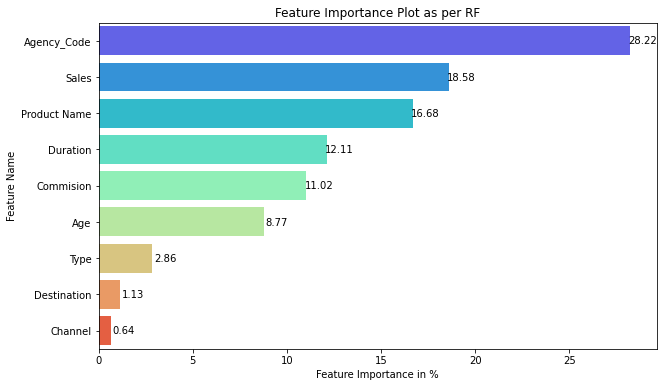

In [1445]:
plt.figure(figsize=(10,6))
plots=sns.barplot(data=df2_fi,x="Important Feature",y=df2_fi.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot as per RF')

# Iterrating over the bars one-by-one 
for bar in plots.patches: 
      #print ('bar_width:', format(bar.get_width(), '.2f'),'bar_height:' , bar.get_height(), 'get_x:', bar.get_x() ,'get_y', bar.get_y() )
      plots.annotate(format(bar.get_width(), '.2f'), (bar.get_width() , bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', 
                   size=10, xytext=(13, 0), 
                   textcoords='offset points') 
plt.show()

#### As per this model, attributes like Type, Commission, Channel and Destination have no imortance in predicting the insurance claims

## Model Evaluation

### Model Score

#### Model score for the Training Data

In [1446]:
#Train Data Accuracy
rf_train_acc=best_grid.score(X_train,train_labels)
rf_train_acc

0.8319047619047619

#### Model score for the Testing Data

In [1447]:
#Test Data Accuracy
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7744444444444445

#### Out of Bag Score for Model

In [1448]:
print(best_grid.oob_score_)

0.7871428571428571


#### Error rate

In [1449]:
## What is the error rate
(1-best_grid.oob_score_)*100

21.285714285714285

### Measuring AUC-ROC Curve

#### AUC and ROC for the training data

AUC: 0.899


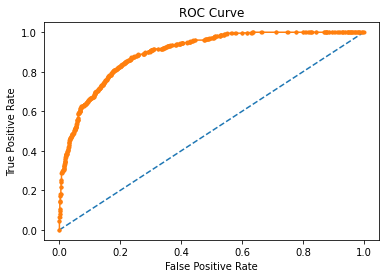

In [1450]:
probs = best_grid.predict_proba(X_train)
rf_train_auc,rf_train_fpr, rf_train_tpr,rf_train_threshholds=calc_AUC_ROC_curve(probs,train_labels)

#### AUC and ROC for the test data

AUC: 0.823


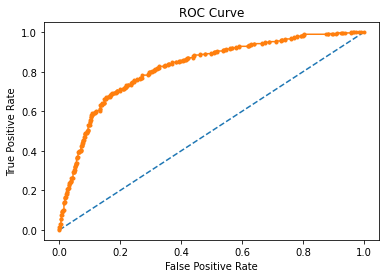

In [1451]:
probs = best_grid.predict_proba(X_test)
rf_test_auc,rf_test_fpr, rf_test_tpr,rf_test_thresholds=calc_AUC_ROC_curve(probs,test_labels)

### Confusion Matrix for the Training data

In [1452]:
from sklearn.metrics import classification_report,confusion_matrix

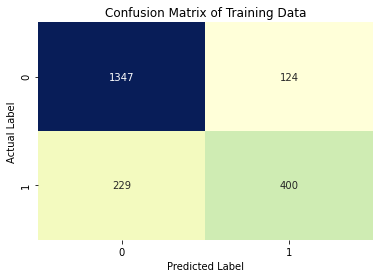

In [1453]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_RF), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Training Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Training data

In [1454]:
print (classification_report(train_labels,ytrain_predict_RF))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1471
           1       0.76      0.64      0.69       629

    accuracy                           0.83      2100
   macro avg       0.81      0.78      0.79      2100
weighted avg       0.83      0.83      0.83      2100



In [1455]:
rf_metrics=classification_report(train_labels, ytrain_predict_RF,output_dict=True)
df2_metrics=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df2_metrics.loc["1"][0],2)
rf_train_recall=round(df2_metrics.loc["1"][1],2)
rf_train_f1=round(df2_metrics.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.76
rf_train_recall  0.64
rf_train_f1  0.69


### Confusion Matrix for the Testing data

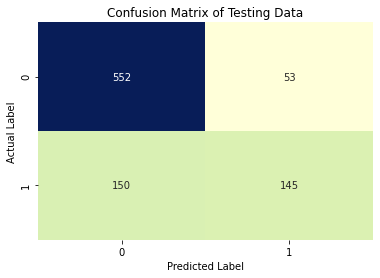

In [1456]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_RF), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Testing Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Testing data

In [1457]:
print (classification_report(test_labels,ytest_predict_RF))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       605
           1       0.73      0.49      0.59       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.77      0.76       900



In [1458]:
rf_metrics=classification_report(test_labels, ytest_predict_RF,output_dict=True)
df2_metrics=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df2_metrics.loc["1"][0],2)
rf_test_recall=round(df2_metrics.loc["1"][1],2)
rf_test_f1=round(df2_metrics.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.73
rf_test_recall  0.49
rf_test_f1  0.59


### Random Forest Conclusion



<b>Train Data: </b>

    AUC: 90%
    Accuracy: 83%
    Precision: 76%
    f1-Score: 69%
    Recall: 64%

<b>Test Data: </b>

    AUC: 82%
    Accuracy: 77%
    Precision: 73%
    f1-Score: 59%
    Recall: 49%


**Its a case for overfitting where train dataset is giving better result as compared to test.**

With recall rate of 49%, model is only able to predict 49% of total tours which were actually claimed as claimed.

Precision is 73% of test data which means, out of total tours predicted by model as claimed , 73% were actually claimed.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Agency Code, Sales, Product Name, Duration and Commission (in same order of preference) are the most important variables in determining if a tour will be claimed from insurance company

Since we are building a model to predict if a tour will be claimed for insurance or not, for practical purposes, we will be more interested in correctly classifying 1 (taking insurance claim) than 0(not taking insurance claim).

If a tour not claiming by the insurer is incorrectly predicted to be claimed by the model, then the impact on cost for the insurance company would be bare minimum. But if a tour claimed by the insurer is incorrectly predicted to be not claimed by the model, then the cost impact would be very high for the insurance company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

#### As Recall rate of test dataset is very poor around 50% thus this doesnt looks good enough for classification 



## MLP Classifier (Artificial Neural Network)

In [1459]:
from sklearn.neural_network import MLPClassifier

### Scaling the test and train data for Neural Networks

In [1460]:
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [1461]:
X_trains

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [1462]:
X_tests

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

### Running the grid search for Neural Network

In [1463]:
ann = MLPClassifier(random_state=1)
cv_value=3


In [1464]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000],
    'verbose':[True]
}

grid_search = run_gridsearch(ann,param_grid,X_trains, train_labels,cv_value)

check_performance(grid_search,X_trains, X_tests, train_labels, test_labels)




 Running grid search

Iteration 1, loss = 0.58631393
Iteration 2, loss = 0.49804875
Iteration 3, loss = 0.48596495
Iteration 4, loss = 0.47797698
Iteration 5, loss = 0.47498761
Iteration 6, loss = 0.47070318
Iteration 7, loss = 0.46797163
Iteration 8, loss = 0.46492609
Iteration 9, loss = 0.46177025
Iteration 10, loss = 0.45884547
Iteration 11, loss = 0.45849657
Iteration 12, loss = 0.45554046
Iteration 13, loss = 0.45311142
Iteration 14, loss = 0.44915988
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.

 Showing best parameters for the grid search

{'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'max_iter': 10000, 'solver': 'adam', 'tol': 0.01, 'verbose': True}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1471
           1       0.72      0.50      0.59       629

    accuracy                           0.79      2100
   macro av

In [1465]:
param_grid = {
    'hidden_layer_sizes': [300,350],
    'activation': [ 'relu'],
    'solver': ['adam','sgd'],
    'tol': [0.0001],#,0.001],
    'max_iter' : [10000],
    'verbose':[True]
}
cv_value = 5
grid_search = run_gridsearch(ann,param_grid,X_trains, train_labels,cv_value)

check_performance(grid_search,X_trains, X_tests, train_labels, test_labels)



 Running grid search

Iteration 1, loss = 0.67144969
Iteration 2, loss = 0.54485214
Iteration 3, loss = 0.49942839
Iteration 4, loss = 0.48512151
Iteration 5, loss = 0.48021647
Iteration 6, loss = 0.47730385
Iteration 7, loss = 0.47601994
Iteration 8, loss = 0.47496608
Iteration 9, loss = 0.47353540
Iteration 10, loss = 0.47248960
Iteration 11, loss = 0.47128076
Iteration 12, loss = 0.47053087
Iteration 13, loss = 0.46912502
Iteration 14, loss = 0.46770418
Iteration 15, loss = 0.46754990
Iteration 16, loss = 0.46609975
Iteration 17, loss = 0.46552893
Iteration 18, loss = 0.46444411
Iteration 19, loss = 0.46360022
Iteration 20, loss = 0.46307218
Iteration 21, loss = 0.46250044
Iteration 22, loss = 0.46125849
Iteration 23, loss = 0.46019425
Iteration 24, loss = 0.45993848
Iteration 25, loss = 0.46020047
Iteration 26, loss = 0.45850499
Iteration 27, loss = 0.45812819
Iteration 28, loss = 0.45719482
Iteration 29, loss = 0.45727118
Iteration 30, loss = 0.45571121
Iteration 31, loss = 0.455

Iteration 252, loss = 0.41549627
Iteration 253, loss = 0.41605448
Iteration 254, loss = 0.41567533
Iteration 255, loss = 0.41515897
Iteration 256, loss = 0.41427827
Iteration 257, loss = 0.41610694
Iteration 258, loss = 0.41475728
Iteration 259, loss = 0.41425074
Iteration 260, loss = 0.41345456
Iteration 261, loss = 0.41397440
Iteration 262, loss = 0.41550962
Iteration 263, loss = 0.41357227
Iteration 264, loss = 0.41425771
Iteration 265, loss = 0.41462635
Iteration 266, loss = 0.41317112
Iteration 267, loss = 0.41328863
Iteration 268, loss = 0.41326846
Iteration 269, loss = 0.41427889
Iteration 270, loss = 0.41327945
Iteration 271, loss = 0.41516697
Iteration 272, loss = 0.41236029
Iteration 273, loss = 0.41244086
Iteration 274, loss = 0.41370579
Iteration 275, loss = 0.41323935
Iteration 276, loss = 0.41256271
Iteration 277, loss = 0.41242524
Iteration 278, loss = 0.41299343
Iteration 279, loss = 0.41342065
Iteration 280, loss = 0.41264822
Iteration 281, loss = 0.41317853
Iteration 

#### Saving the results of best search grid 

In [1466]:
best_grid = grid_search.best_estimator_
ytrain_predict_ANN = best_grid.predict(X_trains)
ytest_predict_ANN = best_grid.predict(X_tests)


## Model Evaluation

### Model Score

#### Model score for the Training Data

In [1467]:
#Train Data Accuracy
nn_train_acc=best_grid.score(X_trains,train_labels)
nn_train_acc

0.8166666666666667

#### Model score for the Testing Data

In [1468]:
#Test Data Accuracy
nn_test_acc=best_grid.score(X_tests,test_labels)
nn_test_acc

0.7722222222222223

### Measuring AUC-ROC Curve

#### AUC and ROC for the training data

AUC: 0.871


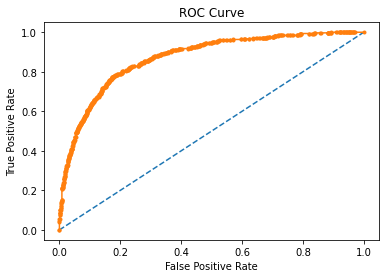

In [1470]:
probs = best_grid.predict_proba(X_trains)
nn_train_auc,nn_train_fpr, nn_train_tpr,nn_train_threshholds=calc_AUC_ROC_curve(probs,train_labels)

#### AUC and ROC for the test data

AUC: 0.809


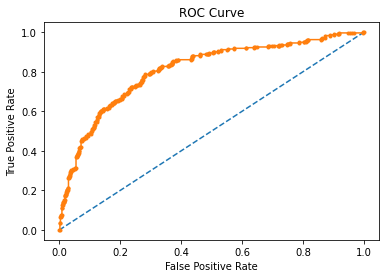

In [1471]:
probs = best_grid.predict_proba(X_tests)
nn_test_auc,nn_test_fpr, nn_test_tpr,nn_test_threshholds=calc_AUC_ROC_curve(probs,test_labels)

### Confusion Matrix for the Training data

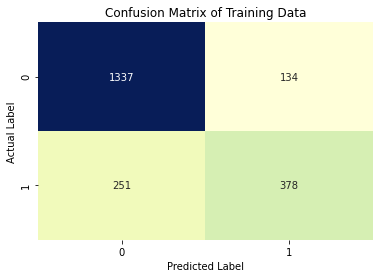

In [1472]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict_ANN), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Training Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Training data

In [1473]:
print (classification_report(train_labels,ytrain_predict_ANN))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1471
           1       0.74      0.60      0.66       629

    accuracy                           0.82      2100
   macro avg       0.79      0.75      0.77      2100
weighted avg       0.81      0.82      0.81      2100



In [1474]:
nn_metrics=classification_report(train_labels, ytrain_predict_ANN,output_dict=True)
df2_metrics=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df2_metrics.loc["1"][0],2)
nn_train_recall=round(df2_metrics.loc["1"][1],2)
nn_train_f1=round(df2_metrics.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.74
nn_train_recall  0.6
nn_train_f1  0.66


### Confusion Matrix for the Testing data

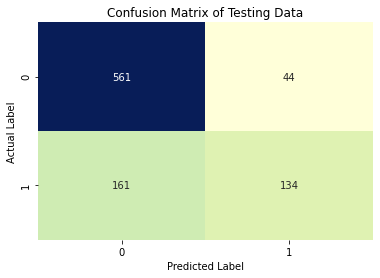

In [1475]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict_ANN), annot =True, cmap='YlGnBu', fmt='d', cbar =False).set(Title='Confusion Matrix of Testing Data',xlabel='Predicted Label', ylabel='Actual Label');

#### Classification Report for Testing data

In [1476]:
print (classification_report(test_labels,ytest_predict_ANN))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       605
           1       0.75      0.45      0.57       295

    accuracy                           0.77       900
   macro avg       0.76      0.69      0.71       900
weighted avg       0.77      0.77      0.75       900



In [1477]:
nn_metrics=classification_report(test_labels, ytest_predict_ANN,output_dict=True)
df2_metrics=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df2_metrics.loc["1"][0],2)
nn_test_recall=round(df2_metrics.loc["1"][1],2)
nn_test_f1=round(df2_metrics.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.75
nn_test_recall  0.45
nn_test_f1  0.57


### Artificial Neural Network Conclusion



<b>Train Data: </b>

    AUC: 87%
    Accuracy: 82%
    Precision: 74%
    f1-Score: 66%
    Recall: 60%

<b>Test Data: </b>

    AUC: 81%
    Accuracy: 77%
    Precision: 75%
    f1-Score: 57%
    Recall: 45%


**Its a case for overfitting where train dataset is giving better result as compared to test.**

With recall rate of 45%, model is only able to predict 45% of total tours which were actually claimed as claimed.

Precision is 75% of test data which means, out of total tours predicted by model as claimed , 75% were actually claimed.

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if a tour will be claimed for insurance or not, for practical purposes, we will be more interested in correctly classifying 1 (taking insurance claim) than 0(not taking insurance claim).

If a tour not claiming by the insurer is incorrectly predicted to be claimed by the model, then the impact on cost for the insurance company would be bare minimum. But if a tour claimed by the insurer is incorrectly predicted to be not claimed by the model, then the cost impact would be very high for the insurance company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

#### As Recall rate of test dataset is very poor around 45% thus this doesnt looks good enough for classification 


## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

### Comparison of the performance metrics from the 3 models

In [1491]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data.T,2)

,Accuracy,AUC,Recall,Precision,F1 Score
CART Train,0.80,0.85,0.61,0.69,0.65
CART Test,0.77,0.80,0.51,0.72,0.60
Random Forest Train,0.83,0.90,0.64,0.76,0.69
Random Forest Test,0.77,0.82,0.49,0.73,0.59
Neural Network Train,0.82,0.87,0.60,0.74,0.66
Neural Network Test,0.77,0.81,0.45,0.75,0.57


We can see following points :-

    •	AUC value is highest for model Random Forest for test and train data.
    •	Accuracy is also high for model Random Forest for test and train data.
    •	F1 score of Random forest is high for Train data set but for test data set CART has the highest.
    •	Recall for train data set is higher than 10% as compared to recall for test data set in all the three dataset.
        Hence it is a case of overfitting for all three models.
    


### ROC Curve for the 3 models on the Training data

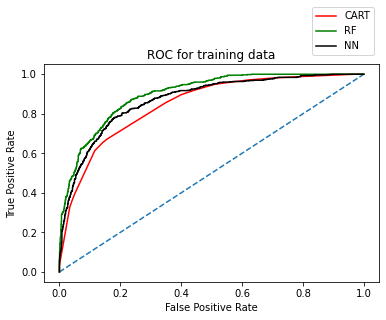

In [1488]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for training data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show;

We can see that area under the curve is more for Random Forest for training data

### ROC Curve for the 3 models on the Test data

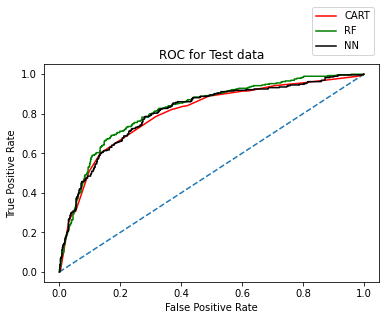

In [1489]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Test data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show();

We can see that area under the curve is slightly more for Random Forest for test data

### Conclusion

We are building a model to predict if a tour will be claimed for insurance or not, for practical purposes, we will be more interested in correctly classifying taking insurance claim than not taking insurance claim.

Hence recall rate (actual data point identified as True by model) is very important in this scenario. F1 score which is dependent on recall and precision is also an important factor in scenario.

In all the three models, train data set is showing better result than the test data set. So its a case of overfitting.

AUC is more than 80% for all three models. Hence AUC is not a problem in any model.
Accuracy is also showing similar result for all three models in test data set.

So we are more interested in Recall and F1 score for comparing three models.

Out of three models, all three are showing similar results. However CART is slighlty giving better F1 score and recall rate than other 2 models. Hence its performance is slightly better than the other 2 models.

Overall all the 3 models are overfitting the results and recall rate is coming as 45-50% which is very low. So all three models doesnt look good enough to predict the whether tour will be claimed or not. 

From Cart and Random Forest Model, the variable Agency code is found to be the most useful feature amongst all other features for predicting whether tour will be claimed or not.

# 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

We have tried to run the three different models (CART/ Random Forest/ Artificial Neuro Network) for predicting whether tour is getting claimed or not for an insurance firm.

Based on the reports and analysis done it was found that all three models were not good enough to predict tour getting claimed (class 1).  The model is useful only in predicting tour not getting claimed (class 0) for which we are getting good results in all three models.

Training data set is giving better result as compared to test dataset. There is an imbalance in the Target dataset (30:70 ratio with claimed tour have 30% of observations).

So our recommendation to the business is as shown below:-

•	In order to further improve the predictive model results for finding the tours which will be claimed in future more accurately, more data sample is required.

•	Current model is useful to predict when tours are not getting claimed with more than 90% accuracy.


•	During analysis, attribute Agency code is found to be the most useful feature amongst all other features for predicting whether tour will be claimed or not.

•	It was found out during exploratory data analysis and in decision tree that around 60% of the tours booked by agency code ‘C2B’ are getting claimed. This percentage is quite high than normal (30%) claims.


•	So business can check with the C2B agency and find out the reasons for getting higher claims. If these reasons are genuine then business can increase the premium amount of insurance for the tours booked by C2B agency to cover up their losses.

•	There were few observations found in which duration of the tour was 0 or negative.  Duration cannot be negative or zero for any tour. So business can check the source of data whether correct information is flowing from that or not.


•	It was found out during exploratory data analysis that Customised plan contains 38% of the total observations (3000). However we can see that under Asia geography, Bronze and Silver plan have taken more claim from insurance as compared to Customised Plan. So business can check why these plans are getting more claim in Asia geography.
